## 生成一些数据

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

/home/liangtian/anaconda3/envs/d2l/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/liangtian/anaconda3/envs/d2l/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


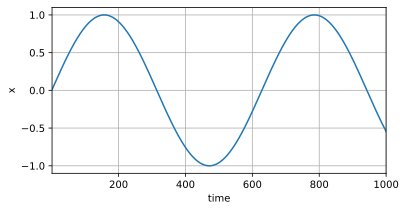

In [38]:
T=1000
# torch.arange(start, end, step, dtype): 
# 生成一个从 start 到 end（不包括 end）的序列，步长为 step，并指定数据类型为 dtype。
time=torch.arange(1,T+1,dtype=torch.float32)
# torch.normal(0, 0.2, (T,)) 这一行代码的意思是生成一个形状为 (T,) 的一维张量，
# 其中每个元素都是从均值为 0，标准差为 0.2 的正态分布（高斯分布）中抽取的随机数。
x=torch.sin(0.01*time)+torch.normal(0,0.2,(T,))
x=torch.sin(0.01*time)
d2l.plot(time, [x], 'time', 'x', xlim=[1, 1000], figsize=(6, 3))


In [39]:
# 构建数据集(训练集和测试集)，使用数据 x 的前 4 个样本来预测第五个样本
tau=4
features=torch.zeros((T-tau,tau))
for i in range(tau):
    features[:,i]=x[i:T-tau+i]

labels=x[tau:].reshape((-1,1))

In [40]:
# 构建dataloader
batch_size, n_train = 16, 600
train_iter=d2l.load_array((features[:n_train],labels[:n_train]),batch_size, is_train=True)
test_iter=d2l.load_array((features[n_train:],labels[n_train:]),batch_size,is_train=False)

In [41]:
# 构建模型


# 写初始化模型的函数
def init_weights(m):
    if isinstance(m,nn.Linear):
        nn.init.xavier_uniform_(m.weight)


def get_net():
    net=nn.Sequential(
        nn.Linear(4,10),
        nn.ReLU(),
        nn.Linear(10,1)
    )
    return net

# 构建损失函数
loss=nn.MSELoss()

In [42]:
# 训练模型
def train(net,train_iter,test_iter,loss,optimizer,num_epochs,lr):
    for epoch in range(num_epochs):
        for data,labels in train_iter:
            net.zero_grad()
            output=net(data)
            l=loss(output,labels)
            l.backward()
            optimizer.step()
        print(f'epoch {epoch+1}, loss {d2l.evaluate_loss(net,train_iter,loss):f}')


net=get_net()
net.apply(init_weights)
lr,num_epochs=0.01,100
optimizer=torch.optim.Adam(net.parameters(),lr=lr)
train(net,train_iter,test_iter,loss,optimizer,num_epochs,lr)



epoch 1, loss 0.013099
epoch 2, loss 0.004537
epoch 3, loss 0.003027
epoch 4, loss 0.002282
epoch 5, loss 0.001621
epoch 6, loss 0.001201
epoch 7, loss 0.000893
epoch 8, loss 0.000702
epoch 9, loss 0.000544
epoch 10, loss 0.000456
epoch 11, loss 0.000447
epoch 12, loss 0.000420
epoch 13, loss 0.000310
epoch 14, loss 0.000291
epoch 15, loss 0.000280
epoch 16, loss 0.000238
epoch 17, loss 0.000227
epoch 18, loss 0.000224
epoch 19, loss 0.000200
epoch 20, loss 0.000194
epoch 21, loss 0.000190
epoch 22, loss 0.000186
epoch 23, loss 0.000175
epoch 24, loss 0.000288
epoch 25, loss 0.000171
epoch 26, loss 0.000160
epoch 27, loss 0.000183
epoch 28, loss 0.000156
epoch 29, loss 0.000157
epoch 30, loss 0.000225
epoch 31, loss 0.000156
epoch 32, loss 0.000152
epoch 33, loss 0.000143
epoch 34, loss 0.000143
epoch 35, loss 0.000137
epoch 36, loss 0.000143
epoch 37, loss 0.000135
epoch 38, loss 0.000129
epoch 39, loss 0.000329
epoch 40, loss 0.000136
epoch 41, loss 0.000125
epoch 42, loss 0.000150
e

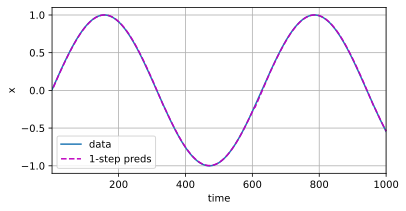

In [43]:
# 查看模型效果（单步预测）
onestep_preds = net(features)
d2l.plot([time, time[tau:]],
         [x.detach().numpy(), onestep_preds.detach().numpy()], 'time',
         'x', legend=['data', '1-step preds'], xlim=[1, 1000],
         figsize=(6, 3))

In [32]:
# 多步预测
# 给前面600个数据点，预测后面所有的数据点
multistep_preds = torch.zeros(T)
multistep_preds[: n_train + tau] = x[: n_train + tau]


torch.Size([604])


In [47]:
max_steps = 64
features = torch.zeros((T - tau - max_steps + 1, tau + max_steps))
# 列i（i<tau）是来自x的观测，其时间步从（i）到（i+T-tau-max_steps+1）
for i in range(tau):
    features[:, i] = x[i: i + T - tau - max_steps + 1]

print(features)
print(features.shape)
# 列i（i>=tau）是来自（i-tau+1）步的预测，其时间步从（i）到（i+T-tau-max_steps+1）
for i in range(tau, tau + max_steps):
    features[:, i] = net(features[:, i - tau:i]).reshape(-1)
print(features)
print(features.shape)

tensor([[0.0100, 0.0200, 0.0300,  ..., 0.0000, 0.0000, 0.0000],
        [0.0200, 0.0300, 0.0400,  ..., 0.0000, 0.0000, 0.0000],
        [0.0300, 0.0400, 0.0500,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.1145, 0.1046, 0.0946,  ..., 0.0000, 0.0000, 0.0000],
        [0.1046, 0.0946, 0.0847,  ..., 0.0000, 0.0000, 0.0000],
        [0.0946, 0.0847, 0.0747,  ..., 0.0000, 0.0000, 0.0000]])
torch.Size([933, 68])
tensor([[ 0.0100,  0.0200,  0.0300,  ..., -0.2972, -0.2969, -0.2965],
        [ 0.0200,  0.0300,  0.0400,  ..., -0.3043, -0.3039, -0.3035],
        [ 0.0300,  0.0400,  0.0500,  ..., -0.2972, -0.2971, -0.2968],
        ...,
        [ 0.1145,  0.1046,  0.0946,  ..., -0.3049, -0.3050, -0.3051],
        [ 0.1046,  0.0946,  0.0847,  ..., -0.3049, -0.3046, -0.3043],
        [ 0.0946,  0.0847,  0.0747,  ..., -0.2969, -0.2966, -0.2963]],
       grad_fn=<CopySlices>)
torch.Size([933, 68])


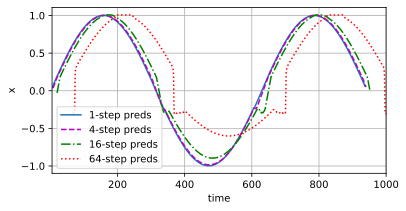

In [48]:
# 效果展示
steps = (1, 4, 16, 64)
d2l.plot([time[tau + i - 1: T - max_steps + i] for i in steps],
         [features[:, (tau + i - 1)].detach().numpy() for i in steps], 'time', 'x',
         legend=[f'{i}-step preds' for i in steps], xlim=[5, 1000],
         figsize=(6, 3))